In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, regularizers
from keras.layers import Dropout, Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.constraints import maxnorm

%matplotlib inline

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most recent call

TypeError: can only concatenate str (not "list") to str

In [4]:
def load_cifar_subset(num_classes = 3):
  (x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()
  
  num_features = x_train_all.shape[1] * x_train_all.shape[2] * x_train_all.shape[3]
  
  x_train_all = x_train_all.reshape(-1, num_features)
  x_test_all = x_test_all.reshape(-1, num_features)

  train_keep = (y_train_all < num_classes).reshape(-1)
  test_keep = (y_test_all < num_classes).reshape(-1)

  y_train = y_train_all[train_keep,]
  x_train = x_train_all[train_keep,]
  y_test = y_test_all[test_keep,]
  x_test = x_test_all[test_keep,]

  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255

  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return (x_train, y_train), (x_test, y_test)
  

In [0]:
def define_model(num_layers = 1, num_neurons = [16], input_shape = (0,), optimizer_lr = 0, dropout = 0, regularizer = "L1", reg_rate = 0):
  
  assert input_shape[0] != 0
  assert num_layers == len(num_neurons)
  
  model = models.Sequential()
  
  for i in range(num_layers):
    if reg_rate:
      if regularizer == "L1":
        model.add(layers.Dense(num_neurons[i], kernel_regularizer = regularizers.l1(reg_rate), activation = 'relu', input_shape = input_shape))
      else:
        model.add(layers.Dense(num_neurons[i], kernel_regularizer = regularizers.l2(reg_rate), activation = 'relu', input_shape = input_shape))
    else:
      model.add(layers.Dense(num_neurons[i],  activation = 'relu', input_shape = input_shape))
      
    
    #Add dropout to all but the penultimate layer.
    if dropout and i < num_layers - 1:
      model.add(layers.Dropout(dropout))
    
  model.add(layers.Dense(3, activation = 'softmax'))
  
  if optimizer_lr:
    optimizer = optimizers.RMSprop(optimizer_lr)
  else:
    optimizer = optimizers.RMSprop()
    
  model.compile(optimizer = optimizer,
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
  
  return model


In [5]:
def smooth_curves(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [6]:
def print_graphs(history, epochs, batch_size, smooth = 0):
  history_dict = history.history
  if smooth:
    accuracy = smooth_curves(history_dict['accuracy'], smooth)
    val_accuracy = smooth_curves(history_dict['val_accuracy'], smooth)
    loss = smooth_curves(history_dict['loss'], smooth)
    val_loss = smooth_curves(history_dict['val_loss'], smooth)
  else:
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
  fig = plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(range(epochs), accuracy, 'r', label = 'Train Accuracy')
  plt.plot(range(epochs), val_accuracy, 'b', label = 'Validation Accuracy')
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(range(epochs), loss, 'r', label = 'Train Loss')
  plt.plot(range(epochs), val_loss, 'b', label = 'Validation Loss')

  plt.legend()
  plt.show()

In [7]:
(x_train, y_train), (x_test, y_test) = load_cifar_subset(3)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-c229ddb94a01>", line 1, in <module>
    (x_train, y_train), (x_test, y_test) = load_cifar_subset(3)
  File "<ipython-input-4-5831a78ce62e>", line 2, in load_cifar_subset
    (x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()
NameError: name 'cifar10' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\arinj\AppData\Roaming\Python\Python3

NameError: name 'cifar10' is not defined

In [49]:
print("x_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))

print("x_val: " + str(x_val.shape))
print("y_val: " + str(y_val.shape))

print("x_test: " + str(x_test.shape))
print("y_test: " + str(y_test.shape))

x_train: (10500, 3072)
y_train: (10500, 3)
x_val: (4500, 3072)
y_val: (4500, 3)
x_test: (3000, 3072)
y_test: (3000, 3)


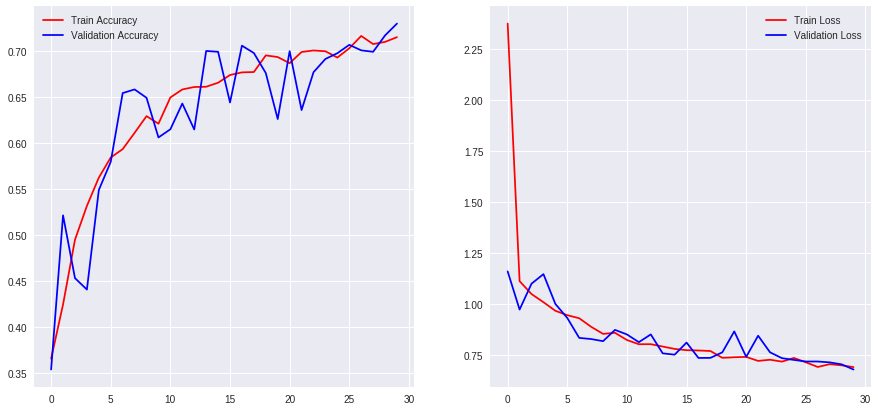

In [50]:
#Base Model
epochs= 30
batch_size = 512

model = define_model(num_layers=1, num_neurons=[64], input_shape=(x_train.shape[1],))
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

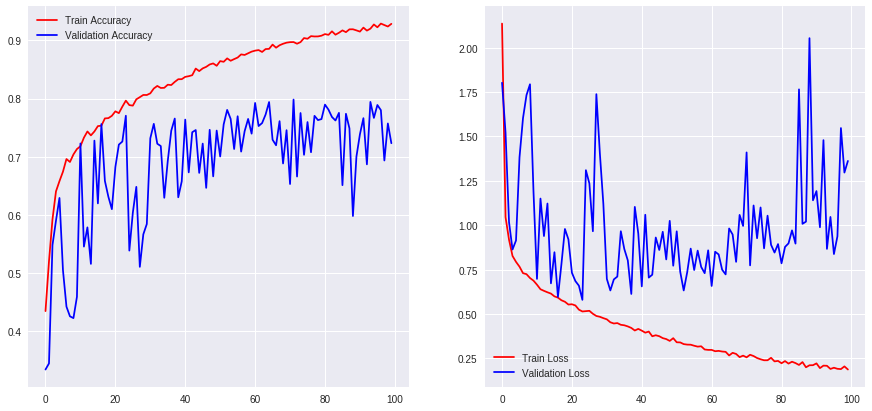

In [9]:
#Adding Layers
epochs= 100
batch_size = 128

model = define_model(num_layers=2, num_neurons=[256,64], input_shape=(x_train.shape[1],))
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

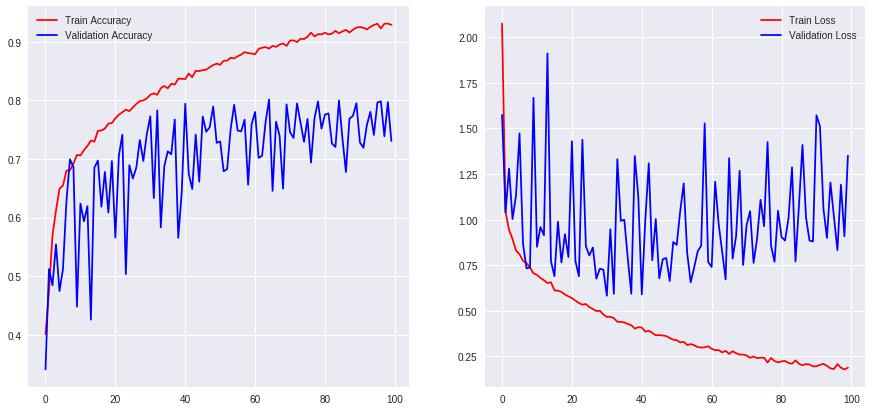

In [10]:
epochs= 100
batch_size = 128

model = define_model(num_layers=2, num_neurons=[512,64], input_shape=(x_train.shape[1],))
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

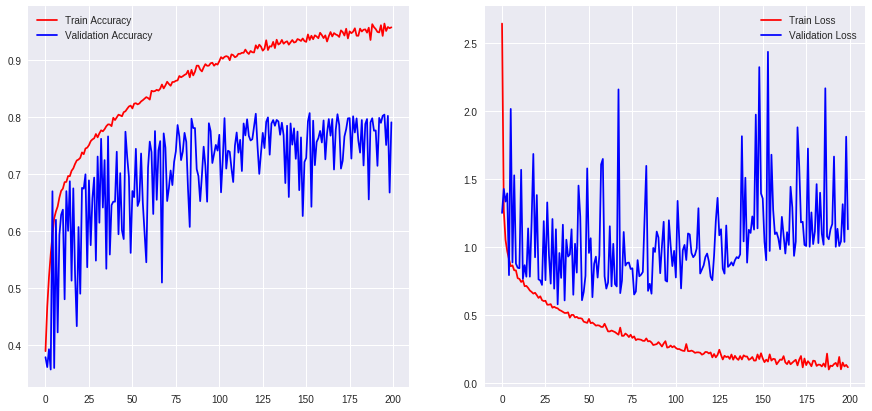

In [11]:
epochs= 200
batch_size = 256

model = define_model(num_layers=2, num_neurons=[512,64], input_shape=(x_train.shape[1],))
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

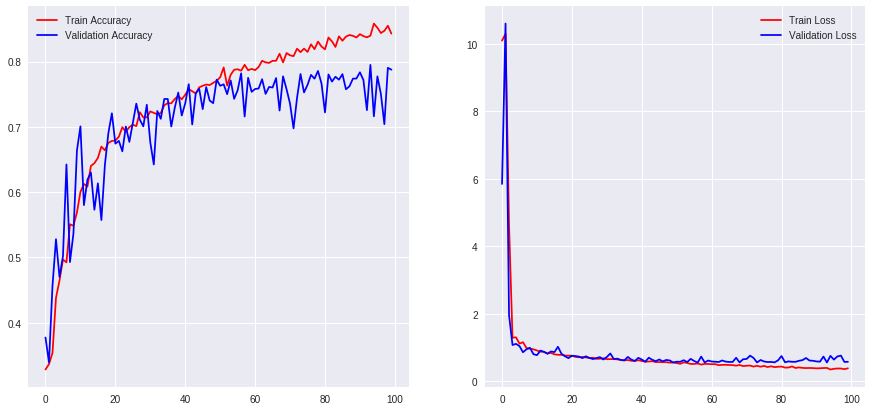

In [12]:
epochs= 100
batch_size = 512

model = define_model(num_layers=2, num_neurons=[512,64], input_shape=(x_train.shape[1],))
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

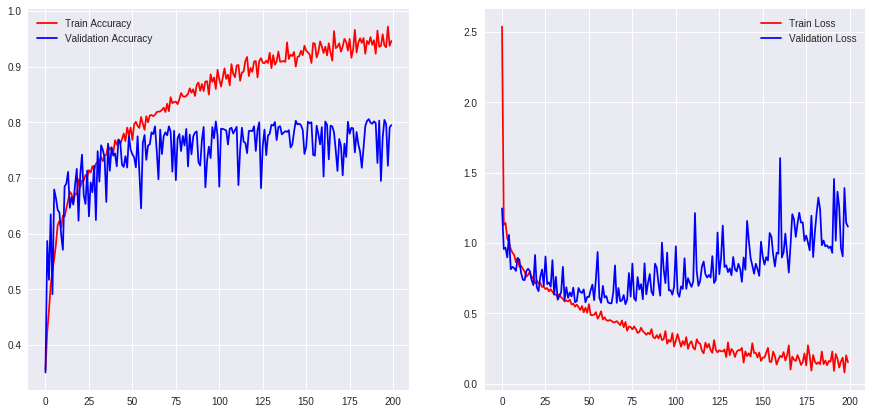

In [13]:
#More layers

epochs= 200
batch_size = 512

model = define_model(num_layers=3, num_neurons=[512,128, 64], input_shape=(x_train.shape[1],))
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

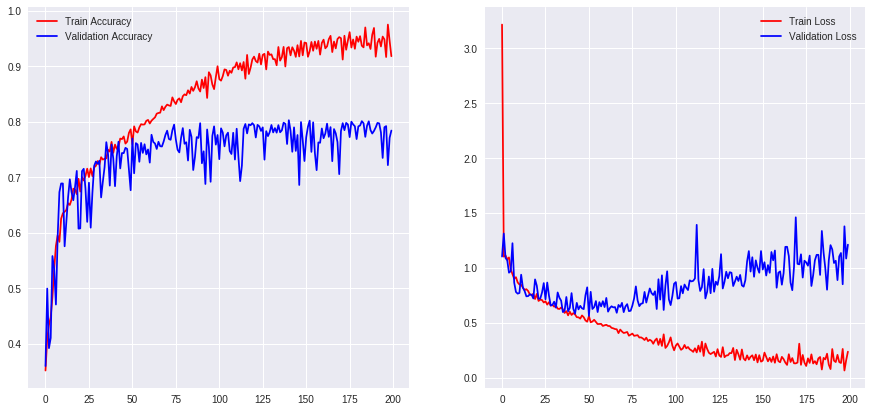

In [14]:
epochs= 200
batch_size = 512

model = define_model(num_layers=4, num_neurons=[512,256, 128, 64], input_shape=(x_train.shape[1],))
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

In [ ]:
#we can see getting similar result at 3 and 4 layer models, so will go with 3 layers model, with a batch size of 512.
#Epochs - Reducing the epochs to 100, since the Validation Loss indicates overfitting beyond 100 epochs.

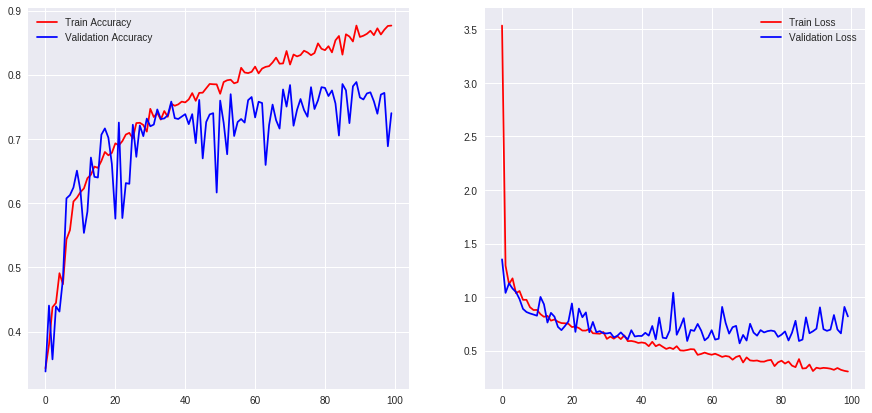

In [51]:
## Changing Learning Rate
epochs= 100
batch_size = 512

model = define_model(num_layers=3, num_neurons=[512, 128, 64], input_shape=(x_train.shape[1],), optimizer_lr=0.001)
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

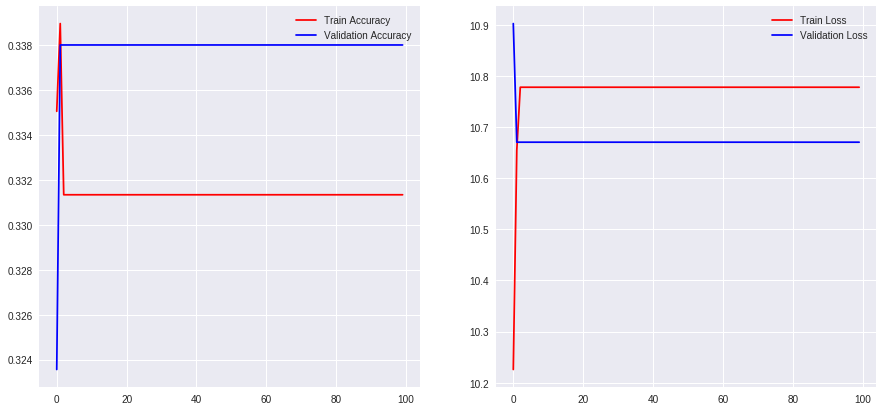

In [52]:
#Learning Rate - 0.01

epochs= 100
batch_size = 512

model = define_model(num_layers=3, num_neurons=[512, 128, 64], input_shape=(x_train.shape[1],), optimizer_lr=0.01)
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

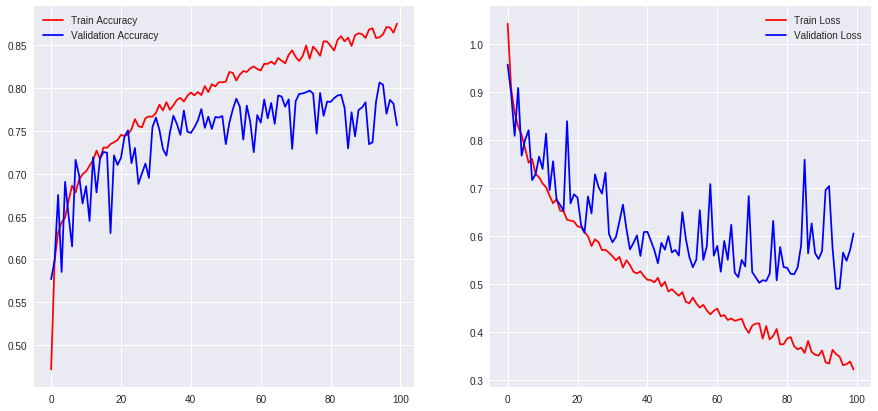

In [53]:
#Learning Rate - 0.0001

epochs= 100
batch_size = 512

model = define_model(num_layers=3, num_neurons=[512, 128, 64], input_shape=(x_train.shape[1],), optimizer_lr=0.0001)
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

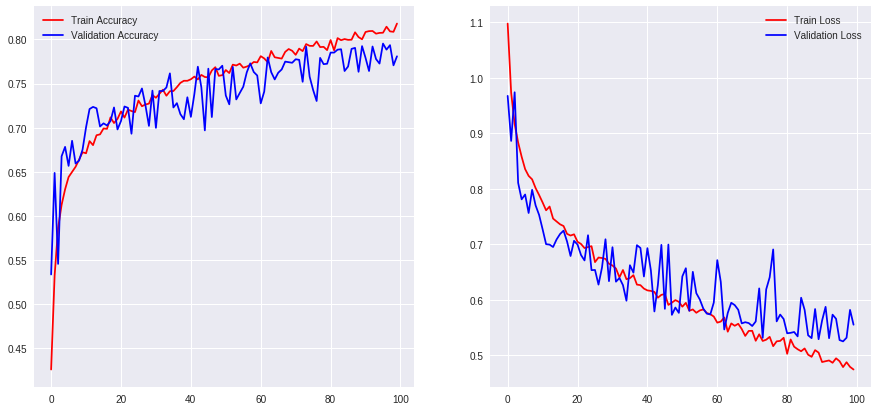

In [54]:
##Adding Dropout
epochs= 100
batch_size = 512

model = define_model(num_layers=3, num_neurons=[512, 128, 64], input_shape=(x_train.shape[1],), optimizer_lr=0.0001, dropout = 0.5)
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

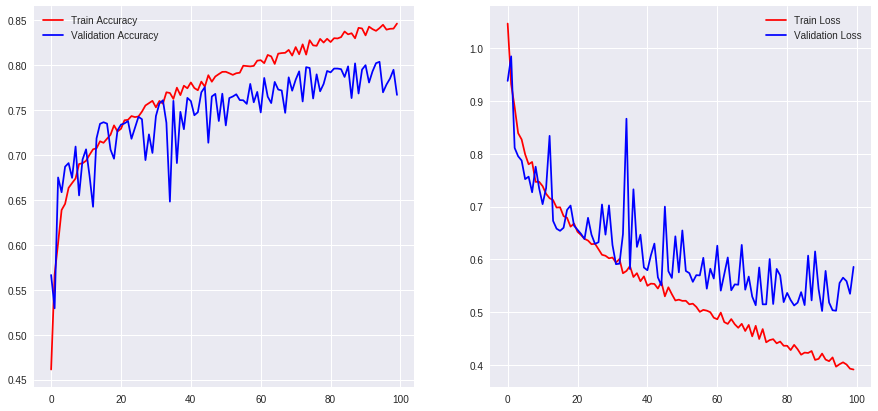

In [55]:
#Smaller Dropout

epochs= 100
batch_size = 512

model = define_model(num_layers=3, num_neurons=[512, 128, 64], input_shape=(x_train.shape[1],), optimizer_lr=0.0001, dropout = 0.2)
history = model.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print_graphs(history=history, epochs = epochs, batch_size = batch_size)

In [ ]:
print("Dropout of 0.5 is more stable")

In [0]:
#Training Final Model
x_train_full = np.append(x_train, x_val, axis = 0)
y_train_full = np.append(y_train, y_val, axis = 0)


In [66]:
epochs = 100
batch_size = 512

final_model = define_model(num_layers=3, num_neurons=[512, 128, 64], input_shape=(x_train_full.shape[1],), 
                           optimizer_lr=0.0001, dropout = 0.5)
history = final_model.fit(x_train_full, y_train_full,
                   epochs = epochs,
                   batch_size = batch_size,
                   verbose = 0)

results = final_model.evaluate(x_test, y_test)

results

3000/3000 [==============================] - 1s 356us/step


[0.48211358865102133, 0.8153333331743876]

In [0]:
final_model.save('AS1_Ciraf_10_model.h5')